# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

In [81]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

### Understand the data

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. Specifically, look at the shapes of the arrays involved.

In [16]:
d, n = X.shape
X.shape, y.shape

((2, 20), (20,))

### Visualize the dataset

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

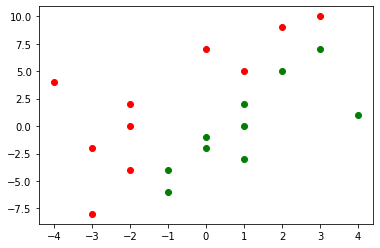

In [82]:
plt.scatter(X[0][y == -1],X[1][y == -1],color='r');
plt.scatter(X[0][y == 1],X[1][y == 1], color='g');

# Looks linearly separable to me

### Linear Separability

Is there another way to determine linear separability?

In [83]:
w = np.zeros(d)
i = 0
while not np.all(w @ X * y > 0):
  if(X[:,i] @ w * y[i] <= 0):
    w +=  X[:,i] * y[i]
  i += 1
w

# simple perceptron algorithm
# if data not linearly separable algo would keep iterating.
# hence, data is separable

array([ 6., -2.])

### Computing the Dual Objective

We shall follow a step-by-step approach to computing the dual objective function.

#### Step-1

Compute the object $\mathbf{Y}$ that appears in the dual problem.

In [84]:
Y = np.diag(y)
Y.shape

(20, 20)

#### Step-2

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem.

In [85]:
# Q because Quadratic Programming Problem

Q = Y.T @ X.T @ X @ Y
Q.shape

(20, 20)

#### Step-3

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

In [86]:
def f(alpha):
  return(0.5 * alpha @ Q @ alpha - alpha.sum())

### Optimize

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$.

In [87]:
alpha_init = np.zeros(n)        # n = X.shape[1]
res = minimize(f, alpha_init,
               bounds=Bounds(0, np.inf))
# res.x is the argmin  of the minimization problem
alpha_opt = res['x']
alpha_opt

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285525, 1.65714065, 1.67142753, 1.68571355,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428422, 1.62856756])

### Support vectors

Find all the support vectors.

In [88]:
X[:, alpha_opt > 0].shape

(2, 6)

### Optimal weight vector (Primal solution)

Find the optimal weight vector $\mathbf{w}^*$.

In [89]:
w_opt = X @ Y @ alpha_opt
w_opt

array([ 2.99998762, -1.00002588])

### Decision Boundary

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot.

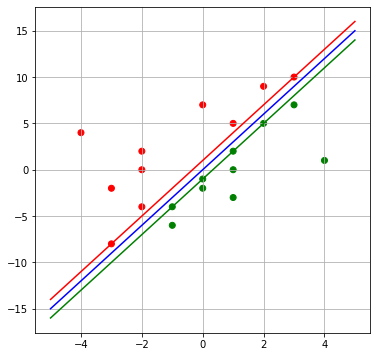

In [90]:
plt.figure(figsize=(6,6))

# datapoints
color = np.array(['none','green','red'])
plt.scatter(X[0],X[1],color=color[y]);

# decision boundary
x = np.linspace(-5,5)
y_ = -w_opt[0] / w_opt[1] * x
plt.plot(x,y_, color='b');

# support vectors
y_ = -w_opt[0] / w_opt[1] * x + 1 / w_opt[1]
plt.plot(x, y_, color='g')

y_ = -w_opt[0] / w_opt[1] * x - 1 / w_opt[1]
plt.plot(x, y_, color='r');
plt.grid();

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [92]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1,
              1, 1])

In [93]:
d,n = X.shape

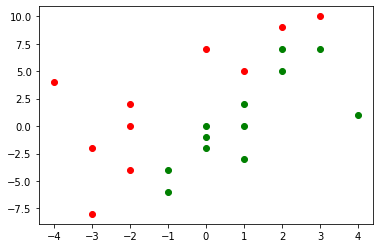

In [94]:
plt.scatter(X[0][y == -1],X[1][y == -1],color='r');
plt.scatter(X[0][y == 1],X[1][y == 1], color='g');

In [95]:
# linear separability?

w = np.zeros(d)
i = 0
while not np.all(w @ X * y > 0):
  if(X[:,i] @ w * y[i] <= 0):
    w +=  X[:,i] * y[i]
  i += 1
w

#  no.

IndexError: ignored

### Relationship between $C$ and margin

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


In [113]:
def plot(X, y, w_opt, C):
  # datapoints
  color = np.array(['none','green','red'])
  plt.scatter(X[0],X[1],color=color[y]);

  # decision boundary
  x = np.linspace(-5,5)
  y_ = -w_opt[0] / w_opt[1] * x
  plt.plot(x,y_, color='b');

  # support vectors
  y_ = -w_opt[0] / w_opt[1] * x + 1 / w_opt[1]
  plt.plot(x, y_, color='g')

  y_ = -w_opt[0] / w_opt[1] * x - 1 / w_opt[1]
  plt.plot(x, y_, color='r');
  plt.grid();
  plt.title(f'C: {C}')

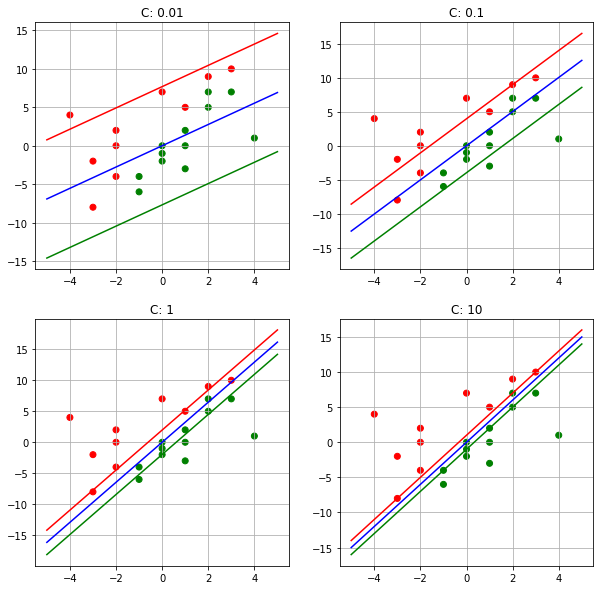

In [115]:
Y = np.diag(y)

Q = Y.T @ X.T @ X @ Y

def f(alpha):
  return(0.5 * alpha @ Q @ alpha - alpha.sum())

plt.figure(figsize=(10,10))
sub_no = 1

for C in [0.01, 0.1, 1, 10]:
  plt.subplot(2,2, sub_no)
  sub_no += 1
  alpha_init = np.zeros(n)
  res = minimize(f, alpha_init,
                bounds=Bounds(0, C))
  # res.x is the argmin  of the minimization problem
  alpha_opt = res['x']
  # print(alpha_opt)
  w_opt = X @ Y @ alpha_opt
  plot(X, y, w_opt, C)

### Support vectors

For $C = 10$, study the number of support vectors that the model has.

In [118]:
X[:, alpha_opt > 0].shape

(2, 8)

In [117]:
X[:, alpha_opt > 0]

array([[ 2,  1,  0, -1,  3, -3,  0,  2],
       [ 5,  2, -1, -4, 10, -8,  0,  7]])